In [16]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.metrics import confusion_matrix
from sklearn.model_selection import validation_curve
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import GridSearchCV
import matplotlib.pyplot as plt
import seaborn as sns

In [17]:
data=pd.read_csv(r"C:\Users\KALPANIGAM\Desktop\digit_svm.csv")

In [18]:
data.shape 

(42000, 785)

In [19]:
data.head()

,label,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,...,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783
0,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,4,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [20]:
data.isnull().sum().head(10)

label     0
pixel0    0
pixel1    0
pixel2    0
pixel3    0
pixel4    0
pixel5    0
pixel6    0
pixel7    0
pixel8    0
dtype: int64

In [21]:
data.describe()

,label,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,...,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783
count,42000.000000,42000.0,42000.0,42000.0,42000.0,42000.0,42000.0,42000.0,42000.0,42000.0,...,42000.000000,42000.000000,42000.000000,42000.00000,42000.000000,42000.000000,42000.0,42000.0,42000.0,42000.0
mean,4.456643,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.219286,0.117095,0.059024,0.02019,0.017238,0.002857,0.0,0.0,0.0,0.0
std,2.887730,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,6.312890,4.633819,3.274488,1.75987,1.894498,0.414264,0.0,0.0,0.0,0.0
min,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.0,0.0,0.0,0.0
25%,2.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.0,0.0,0.0,0.0
50%,4.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.0,0.0,0.0,0.0
75%,7.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.0,0.0,0.0,0.0
max,9.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,254.000000,254.000000,253.000000,253.00000,254.000000,62.000000,0.0,0.0,0.0,0.0


In [22]:
print("Dimensions: ",data.shape, "\n")

Dimensions:  (42000, 785) 



In [23]:
print(data.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 42000 entries, 0 to 41999
Columns: 785 entries, label to pixel783
dtypes: int64(785)
memory usage: 251.5 MB
None


In [24]:
data.head()

,label,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,...,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783
0,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,4,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [25]:
print(data.columns)

Index(['label', 'pixel0', 'pixel1', 'pixel2', 'pixel3', 'pixel4', 'pixel5',
       'pixel6', 'pixel7', 'pixel8',
       ...
       'pixel774', 'pixel775', 'pixel776', 'pixel777', 'pixel778', 'pixel779',
       'pixel780', 'pixel781', 'pixel782', 'pixel783'],
      dtype='object', length=785)


In [26]:
order = list(np.sort(data['label'].unique()))

In [27]:
print(order)

[0, 1, 2, 3, 4, 5, 6, 7, 8, 9]


<AxesSubplot:ylabel='count'>

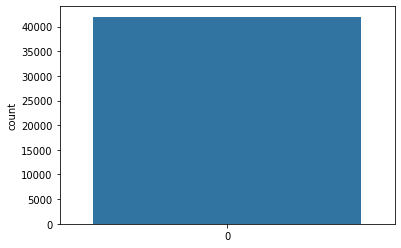

In [28]:
sns.countplot(data["label"])

1    4684
7    4401
3    4351
9    4188
2    4177
6    4137
0    4132
4    4072
8    4063
5    3795
Name: label, dtype: int64

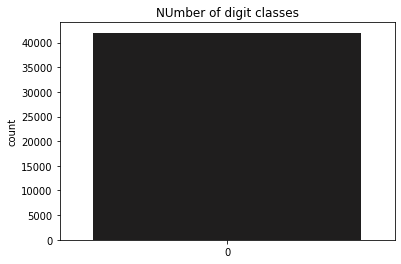

In [29]:
plt.plot(figure = (16,10))
g = sns.countplot(data["label"], palette = 'icefire')
plt.title('NUmber of digit classes')
data.label.astype('category').value_counts()

Text(0.5, 1.0, 'Digit 4')

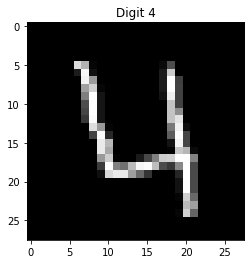

In [30]:
four = data.iloc[3, 1:]
four.shape
four = four.values.reshape(28,28)
plt.imshow(four, cmap='gray')
plt.title("Digit 4")


Text(0.5, 1.0, 'Digit 7')

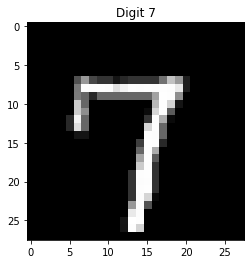

In [31]:
seven = data.iloc[6, 1:]
seven.shape
seven = seven.values.reshape(28, 28)
plt.imshow(seven, cmap='gray')
plt.title("Digit 7")

In [32]:
round(data.drop('label', axis=1).mean(), 2)

pixel0      0.0
pixel1      0.0
pixel2      0.0
pixel3      0.0
pixel4      0.0
           ... 
pixel779    0.0
pixel780    0.0
pixel781    0.0
pixel782    0.0
pixel783    0.0
Length: 784, dtype: float64

In [33]:
y=data['label']

In [34]:
x=data.drop(columns = 'label')

In [35]:
print(data.shape)

(42000, 785)


In [36]:
x/=255.0

In [37]:
print("x:", x.shape)

x: (42000, 784)


In [38]:
from sklearn.preprocessing import scale

In [39]:
x_scaled=scale(x)

In [40]:
x_train,x_test,y_train,y_test=train_test_split(x_scaled,y,test_size=0.3,train_size=0.2,random_state=10)

In [41]:
model_linear=SVC(kernel='linear')
model_linear.fit(x_train, y_train)

SVC(kernel='linear')

In [42]:
y_pred=model_linear.predict(x_test)

In [43]:
from sklearn import metrics
from sklearn.metrics import confusion_matrix

In [44]:
print("accuracy:", metrics.accuracy_score(y_true=y_test, y_pred=y_pred), "\n")

accuracy: 0.9133333333333333 



In [45]:
print(metrics.confusion_matrix(y_true=y_test, y_pred=y_pred))

[[1160    0    0    1    6    6   12    1    1    1]
 [   0 1389    3    4    3    0    0    2   12    0]
 [   9   11 1146   38   11    4   10   12   17    2]
 [   5    4   35 1204    0   51    2    3   21    6]
 [   3    3   20    3 1132    1   10    4    2   40]
 [   9   17   10   67    7  997   14    2   19    7]
 [  15    2   15    0    9   15 1160    1    2    0]
 [   5   12   18    9   26    2    1 1212    3   42]
 [   8   31   24   45    8   61    9   14 1002   15]
 [   9    6    7   28   56    3    0   53    7 1106]]


In [46]:
non_linear_model = SVC(kernel='rbf')

In [47]:
non_linear_model.fit(x_train, y_train)

SVC()

In [49]:
y_pred = non_linear_model.predict(x_test)

In [50]:
print("accuracy:", metrics.accuracy_score(y_true=y_test, y_pred=y_pred), "\n")

accuracy: 0.9348412698412698 



In [51]:
print(metrics.confusion_matrix(y_true=y_test, y_pred=y_pred))

[[1156    0    5    1    0    2   12    6    5    1]
 [   0 1389    4    3    4    0    2    6    5    0]
 [   2    4 1170   19    5    0    9   35   15    1]
 [   1    4   19 1237    0   20    2   32   13    3]
 [   0    4   25    0 1133    0    9   17    3   27]
 [   1    9    5   42    3 1047   17   11    8    6]
 [  13    2    5    0    2   15 1156   24    2    0]
 [   3   10    9    3   15    0    0 1256    1   33]
 [   5   19   14   25    7   21    8   15 1095    8]
 [   4    4    6   30   23    2    1   61    4 1140]]


In [52]:
folds = KFold(n_splits = 5, shuffle = True, random_state = 10)

In [53]:
hyper_params = [ {'gamma': [1e-2, 1e-3, 1e-4],
                     'C': [5,10]}]

In [54]:
model = SVC(kernel="rbf")

In [55]:
model_cv = GridSearchCV(estimator = model, 
                        param_grid = hyper_params, 
                        scoring= 'accuracy', 
                        cv = folds, 
                        verbose = 1,
                        return_train_score=True)   

In [56]:
model_cv.fit(x_train, y_train)

Fitting 5 folds for each of 6 candidates, totalling 30 fits


GridSearchCV(cv=KFold(n_splits=5, random_state=10, shuffle=True),
             estimator=SVC(),
             param_grid=[{'C': [5, 10], 'gamma': [0.01, 0.001, 0.0001]}],
             return_train_score=True, scoring='accuracy', verbose=1)

In [46]:
cv_results = pd.DataFrame(model_cv.cv_results_)

In [47]:
cv_results

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_C,param_gamma,params,split0_test_score,split1_test_score,split2_test_score,...,mean_test_score,std_test_score,rank_test_score,split0_train_score,split1_train_score,split2_train_score,split3_train_score,split4_train_score,mean_train_score,std_train_score
0,30.765560,0.780498,6.153610,0.425687,5,0.01,"{'C': 5, 'gamma': 0.01}",0.755357,0.757143,0.779167,...,0.766667,0.011536,5,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.000000
1,6.333476,0.470289,3.079502,0.197490,5,0.001,"{'C': 5, 'gamma': 0.001}",0.936310,0.945238,0.946429,...,0.944524,0.004508,2,0.996875,0.996577,0.996429,0.996875,0.996280,0.996607,0.000238
2,6.062492,0.560537,3.867674,0.096802,5,0.0001,"{'C': 5, 'gamma': 0.0001}",0.914286,0.925595,0.922024,...,0.922976,0.007169,4,0.950446,0.950893,0.950000,0.947768,0.947619,0.949345,0.001379
3,34.057574,2.048821,8.066429,1.391999,10,0.01,"{'C': 10, 'gamma': 0.01}",0.755357,0.757143,0.779167,...,0.766667,0.011536,5,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.000000
4,7.207213,0.738349,3.898178,0.383651,10,0.001,"{'C': 10, 'gamma': 0.001}",0.933929,0.945238,0.947024,...,0.944881,0.005815,1,0.999405,0.999405,0.999405,0.999405,0.999405,0.999405,0.000000
5,5.264903,0.213180,3.416068,0.085429,10,0.0001,"{'C': 10, 'gamma': 0.0001}",0.911310,0.928571,0.927976,...,0.926071,0.009278,3,0.963542,0.964137,0.963839,0.961607,0.959524,0.962530,0.001744


In [48]:
cv_results['param_C'] = cv_results['param_C'].astype('int')

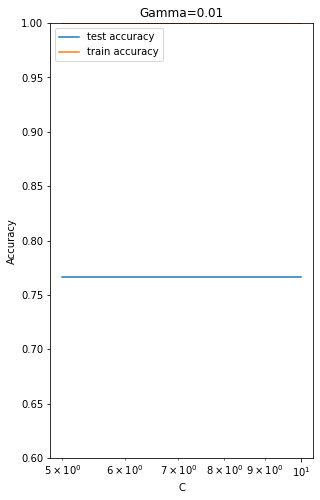

In [49]:
plt.figure(figsize=(16,8))
plt.subplot(131)
gamma_01 = cv_results[cv_results['param_gamma']==0.01]

plt.plot(gamma_01["param_C"], gamma_01["mean_test_score"])
plt.plot(gamma_01["param_C"], gamma_01["mean_train_score"])
plt.xlabel('C')
plt.ylabel('Accuracy')
plt.title("Gamma=0.01")
plt.ylim([0.60, 1])
plt.legend(['test accuracy', 'train accuracy'], loc='upper left')
plt.xscale('log')

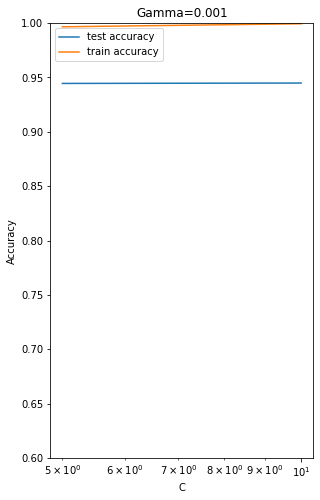

In [50]:
plt.figure(figsize=(16,8))
plt.subplot(132)
gamma_001 = cv_results[cv_results['param_gamma']==0.001]

plt.plot(gamma_001["param_C"], gamma_001["mean_test_score"])
plt.plot(gamma_001["param_C"], gamma_001["mean_train_score"])
plt.xlabel('C')
plt.ylabel('Accuracy')
plt.title("Gamma=0.001")
plt.ylim([0.60, 1])
plt.legend(['test accuracy', 'train accuracy'], loc='upper left')
plt.xscale('log')

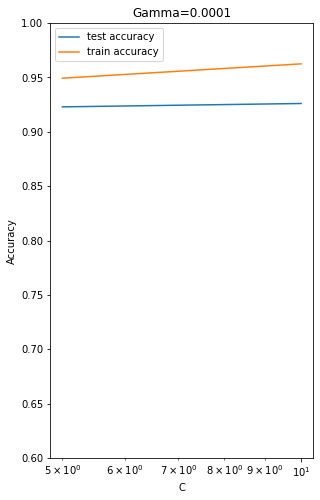

In [51]:
plt.figure(figsize=(16,8))
plt.subplot(133)
gamma_0001 = cv_results[cv_results['param_gamma']==0.0001]

plt.plot(gamma_0001["param_C"], gamma_0001["mean_test_score"])
plt.plot(gamma_0001["param_C"], gamma_0001["mean_train_score"])
plt.xlabel('C')
plt.ylabel('Accuracy')
plt.title("Gamma=0.0001")
plt.ylim([0.60, 1])
plt.legend(['test accuracy', 'train accuracy'], loc='upper left')
plt.xscale('log')


In [52]:
best_score = model_cv.best_score_
best_hyperparams = model_cv.best_params_

print("The best test score is {0} corresponding to hyperparameters {1}".format(best_score, best_hyperparams))

The best test score is 0.9448809523809523 corresponding to hyperparameters {'C': 10, 'gamma': 0.001}


In [55]:
# model with optimal hyperparameters

# model
model = SVC(C=10, gamma=0.001, kernel="rbf")

model.fit(x_train, y_train)
y_pred = model.predict(x_test)

# metrics
print("accuracy", metrics.accuracy_score(y_test, y_pred), "\n")
print(metrics.confusion_matrix(y_test, y_pred), "\n")

accuracy 0.9438888888888889 

[[1163    0    4    1    1    2    8    6    3    0]
 [   0 1389    4    2    4    0    1    9    4    0]
 [   1    4 1184   14    5    1    9   30    7    5]
 [   0    3   15 1263    0   14    2   23    8    3]
 [   1    2   20    3 1149    0   10   10    2   21]
 [   2    8    3   30    4 1064   15    9   11    3]
 [   8    1    3    0    3   13 1167   23    1    0]
 [   4    9   10    8   12    0    0 1255    2   30]
 [   5   18   17   23    8   20    5   13 1098   10]
 [   5    3    2   27   21    1    1   51    3 1161]] 

